# Taxonomy Prediction
## Given some text content, come up with a solution to build the Taxonomy.

# Preface
</br>

## Problem Description
In Taxonomy Creation problem, we have a dataset collected from some QnA website which contains Title, Body and associated Tags.</br>

Our model will have to categorize text into various domains, based on occurrence of certain words. 

Any question can be categorized into multiple domains, that is it can have multiple tags.

This problem and it’s dataset is taken from [Facebook Recruiting III - Keyword Extraction competition held on Kaggle](https://www.kaggle.com/c/facebook-recruitingiii-keyword-extraction/rules).

</br>

## Skills required to tackle the problem:
▪ Machine Learning </br>
▪ Natural Language Processing </br>
▪ Data Engineering </br>
▪ Working with multiple processors </br>

</br>

This is a Multi-Class Multi-Label problem, since we have to determine all the classes of tags a question belongs to.

Thus, we need to train model to predict a binary output for each tag for any given question. 

</br>

## Training Dataset contains roughly 60M examples in 4 Columns:
• Id – Unique identifier for each question</br>
• Title – The question's title</br>
• Body – The body of the question</br>
• Tags – The tags associated with the question</br>

</br>

## Libraries used:
▪ Numpy – To handle efficient arrays in RAM.</br>
▪ Pandas – To created manageable Data Frames.</br>
▪ Matplotlib – To plot the data in graphs for better understanding.</br>
▪ Scikit-Learn – To apply ML models and algorithms on data.</br>
▪ Scipy – To store sparse matrices in efficient format.</br>
▪ Pickle – To save models and vectorizers used on data.</br>

</br>

### Since the dataset size is very large for local machines: 
 
#### ▪ We only use the most frequent 500 tags from the dataset. 
 
> We randomly sample examples from dataset such that their associated tags belong to only the top 500 tags. 
 
 
#### ▪ We only use 500,000 examples all which contain tags belonging to the set of top 500 tags. 
 
> This sampling is done to reduce the overhead on the processor and also it can be verified that top 500 tags cover most of the questions and 500,000 quality examples are enough to give highly acceptable output.

</br>

In our problem, the questions can be classified based on individual words and there is not so much significance of order in which words appear in the text, we can use the simplest model of all: **Bag-Of-Words** model.


![Image - Bag of Words](https://ldabook.com/Images/BagOfWords.png)

# Solution Approach

## Data Exploration
▪ Check for all NaN values in data. </br>
▪ Plot tags frequency.</br>
▪ Check how tags are distributed among question.</br>
▪ Obtain Conclusion and Strategize next steps.</br> 

## Data Cleaning and Data Engineering
▪ Remove unnecessary features from data [Id]. </br>
▪ Drop all rows where Tags column is NaN.</br>
▪ Select Most Frequent 500 tags</br>
> Create a list of top 500 tags.</br>
> Find indices of examples containing all tags as a subset of top 500 tags.</br>

▪ Sample 500,000 indices from list of indices obtained from previous step.</br>
▪ Sample the training set using those indices and save. </br>

## Further Data Engineering
▪ Using Regular Expression, clean all the Titles in the Title column.</br>
▪ Separate Code part from the Body and put into Code column</br>
▪ Clean Body column using Regular Expression</br>
▪ Similarly, clean Code Column</br>
▪ Create new Data Frame by adding Title, Body and Code columns, separated by space into a single column. </br>


## Tokenize + Remove Stop words + Stemming 
▪ Loop through all the 500,000 examples: </br>
> Tokenize the text </br>
> Remove Stop words from it </br>
> Stem the remaining words </br>
> Join the words again to form a string </br>

▪ Save the new modified dataset.</br>


## Vectorizing
▪ Apply binary Count Vectorizer on Tags </br>
▪ Apply Count Vectorizer on Text</br>


## Training 
▪ Train Stochastic Gradient Descent model. </br>
▪ Train Support Vector Classifier </br>
▪ Train Logistic Regression Classifier </br>


## Testing 
▪ Test different models on data. </br>
▪ Select the best performance model </br>

</br>

> ## **Let's Code it in the next section!**

# Data Exploration
> In this part, we'll have a look at how our data is structured, we'll look at the patterns with which labels (Tags) are affected.</br>

We'll note our observations and make conclusions about the data. </br>
Based on these observations, we'll strategize our next steps to tackle the problem.

## Steps:
1. We'll look at the shape of data.
2. We'll look at few data points.
3. We'll look at the no of NaN values in each column.
4. We'll plot graphs


In [0]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import data

df = pd.read_csv("data/Train.csv")

In [0]:
# Data frame shape and few data points

print(df.shape)
df.head(5)

(6034195, 4)


,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


**We have over 60 million examples**

In [0]:
# Checking for NaNs in each column

df.isna().sum()

Id       0
Title    0
Body     0
Tags     8
dtype: int64

**So, we have 8 such questions which have no tags associated with them.**

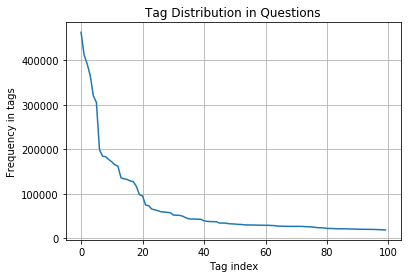

In [0]:
# Plotting Tag Distribution in questions.

# creating a list of all tags
all_tags = [tag for slist in df["Tags"].dropna().values for tag in slist.split()]

# counting each tag
import collections
counter=collections.Counter(all_tags)

# creating a list of most frequent 100 tags
tags_list = [ y for x, y in sorted(counter.items(), key=lambda x: x[1], reverse=True) ]
top_100_tags = tags_list[:100]

# plotting the frequency
plt.plot(top_100_tags)
plt.title("Tag Distribution in Questions")
plt.grid()
plt.xlabel("Tag index")
plt.ylabel("Frequency in tags")
plt.show()

**So, this was distribution of top 100 tags in all of 60M questions.**

> As we can see, most of the tags are used negligibly in the dataset. thus some tags are very highly probable to occur and some are very low probable.

This gives our dataset some bais, which hopefully is avoidable.

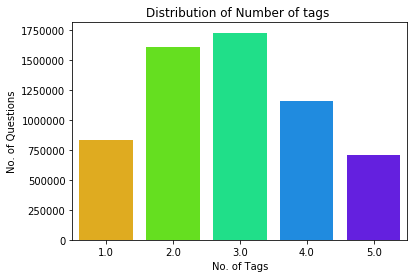

In [0]:
# Plotting no of tags in questions

# counting the no of tags in each question
df["Tag_Counts"] = df.dropna().Tags.str.split().apply(lambda x: len(x))
tag_counts =  df.dropna()["Tag_Counts"].tolist()

# dropping unnecessary columns
df.drop(columns = ["Tag_Counts"], inplace=True)

# plotting using seaborn
import seaborn as sbn
sbn.countplot(tag_counts, palette='gist_rainbow')
plt.title("Distribution of Number of tags ")
plt.xlabel("No. of Tags")
plt.ylabel("No. of Questions")
plt.show()

**So, it can be seen that most of the question have 2 or 3 tags.**


### Concluding Data Exploration
**We have to clean and process our data since:**
> It has NaN tags

> It has code in the Body, which is not compatible with bag of words model.

> The no of tags is too large.

> The no of questions is too large.

</br>

It can be observed that only the top 100 tags are used frequently in the dataset.
So, we'll use top 500 tags for safety.

Also, due to limited computation power, we'll use only 500,000 examples.

</br>

### So,we perform following operations:
> Get rid of Id column.

> Find most frequent 500 tags.

> Filter questions contaning only those of top 500 tags

> Sample 500,000 examples from these.

# Data Cleaning and Data Engineering 

Here, it is advised to clean the RAM or restart runtime.

In [0]:
# Dropping all NaN tags and corresponding questions

import pandas as pd
# loading data
df = pd.read_csv("data/Train.csv")
print("Shape of dataset Before: ", df.shape)

# dropping nans
df.dropna(inplace=True)

# creating new index
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

print("Shape of dataset After: ", df.shape)

Before:  (6034195, 4)
After:  (6034187, 4)


In [0]:
# dropping Id column

df.drop(columns=["Id"], inplace=True)

# Marking data checkpoint
df.to_csv("data/2_Train_No_NaN.csv", index=False)

In [0]:
# !cp data/2_Train_No_NaN.csv drive/My\ Drive/tcs/

#### Now we'll find most frequent 500 tags.

In [0]:
# Importing new dataset

import pandas as pd
df = pd.read_csv("data/2_Train_No_NaN.csv")

print(df.shape)
df.head()

(6034187, 3)


,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [0]:
# list of all tags in all questions
all_tags = [tag for slist in df["Tags"].values for tag in slist.split()]

print ("Total no of tags in all questions:", len(all_tags))

Total no of tags in all questions: 17409986


In [0]:
# Counting tag frequency and selecting top 500 tags

import collections

# counting tag frequency
counter=collections.Counter(all_tags)
counter = { x:y for x, y in sorted(counter.items(), key=lambda x: x[1], reverse=True) }

# selecting top 500 tags
top_tags = set(list(counter.keys())[:500])

In [0]:
# finding indices of questions which have only top 500 tags

req_indices=[]

# question's tag set must be a subset of out top tags list
for i in range(df.shape[0]):
  tags = set(df["Tags"][i].split())
  if tags.issubset(top_tags):
    req_indices.append(i)

# indices of all appropriate questions
print(req_indices[:10])


[1, 3, 7, 11, 14, 17, 21, 23, 25, 31]


In [0]:
# sampling 500000 examples with top 500 tags only

# selecting 500,000 indices
import random
req_indices_5L = random.sample(req_indices, k=500000)

# sampling questions from dataset
df = df.iloc[req_indices_5L, :]

# creating new index
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

# saving new dataset
df.to_csv("data/3_Train_5L.csv", index=True)
# !cp 3_Train_5L.csv drive/My\ Drive/tcs/


# OPTIONAL
# saving indices list
# req_indices_df = pd.DataFrame({"Indices": req_indices_5L})
# req_indices_df.to_csv("data/req_indices.csv", index=False)
# !cp data/req_indices.csv drive/My\ Drive/tcs/

## Our Dataset Now

In [0]:
print(df.shape)
df.head()

(500000, 3)


,Title,Body,Tags
0,graph of linked tags,"<p>Hi I have a list of lists of linked tag, li...",python graph
1,If condition for redirection in jquery?,<p>Edit... </p>\n\n<p>Someone suggested I do i...,javascript jquery redirect
2,git for development and svn on production server,<p>I have an website on development using git ...,git svn deployment integration
3,How to use HTML Image Button and PHP?,"<p>Okay, so here's the scenario. I have a simp...",php html
4,Using 'LIKE' against column names in a where c...,<p>I started to take a look at the following q...,sql sql-server sql-server-2008 sql-server-2005...


# Lets clean the Title, Body and Code

In [0]:
import pandas as pd

df = pd.read_csv("data/3_Train_5L.csv", usecols=["Title", "Body", "Tags"])

In [0]:
# Cleaning Titles using Regular Expressions

import re

titles_list=[]
for i in range(df.shape[0]):
  # taking out html tags if any
  x = re.sub(r"</{0,1}[\w]+>", " ", df["Title"][i] )
  # replacing c++ and c#
  x= re.sub(r"C\+\+", "CPP", x)
  x = re.sub(r"C#", "CSHARP", x)
  # removing non alpahbets
  x = re.sub(r"[^a-zA-Z]+", " ", x)
  # removing extra spaces
  x = re.sub(r"[\s]+", " ", x)
  # removing all single letters
  x = re.sub(r"(?:^| )+[a-bd-qs-zA-BD-QS-Z](?=$| )+", "", x)

  # adding to list
  titles_list.append(x.lower())

# replacing in dataset
df["Title"] = titles_list




In [0]:
# cleaning the body


import re
code_list=[]
bodies_list=[]
for i in range(df.shape[0]):
  # separating the code
  code = str( re.findall(r"<code>(.*?)</code>", df["Body"][i], flags=re.DOTALL) ) or "No_code"
  # removing code from body
  x = re.sub(r"<code>(.*?)</code>", " ", df["Body"][i], flags=re.MULTILINE|re.DOTALL)
  # removing html tags
  x = re.sub(r"</{0,1}[\w]+>", " ", x )
  # replacing c+ and c#
  x = re.sub(r"C\+\+", "CPP", x)
  x = re.sub(r"C#", "CSHARP", x)
  # removing non alphabets
  x = re.sub(r"[^a-zA-Z]+", " ", x)
  # removing extra spaces
  x = re.sub(r"[\s]+", " ", x)
  # removing single characters
  x = re.sub(r"(?:^| )+[a-bd-qs-zA-BD-QS-Z]{1,2}(?=$| )+", "", x)

  # adding to list
  bodies_list.append(x.lower())
  code_list.append(code.lower())


# replacing in dataset
df["Body"] = bodies_list
df["Code"] = code_list



In [0]:
# cleaning the code

import re
clean_code_list = []
for i in range(df.shape[0]):
  # removing non alphabets 
  x = re.sub(r"[^a-zA-Z]+", " ", df["Code"][i])
  # removing all less than 3 letter words
  x = re.sub(r"\b\w{1,3}\b", " ", x)
  # removing all extra spaces
  x = re.sub(r"[\s]+", " ", x)
  # removing left and right spaces
  x = x.strip()

  # adding to list
  clean_code_list.append(x)


# replacing in dataset
df["Code"] = clean_code_list

In [0]:
# looking at new dataset

df.head()

,Title,Body,Tags,Code
0,graph of linked tags,have list lists linked tag like this each sub...,python graph,some tags interactive media berlin gallery eve...
1,if condition for redirection in jquery,edit someone suggested differently were use h...,javascript jquery redirect,options followsymlinks nrewriteengine nrewrite...
2,git for development and svn on production server,have website development using git control ve...,git svn deployment integration,
3,how to use html image button and php,okay here the scenario have simple html page ...,php html,html head head body form action submit method ...
4,using like against column names in where clause,started take look the following question href...,sql sql-server sql-server-2008 sql-server-2005...,select orderid productid unitprice quantity di...


In [0]:
# Saving to new csv to mark checkpoint

df.to_csv("data/4_Cleaned_Train.csv", index=True)

# !cp data/4_Cleaned_Train.csv drive/My\ Drive/tcs/

## Lets add all text together

Now we have cleaned the Title, Body and Code, so we can add them into a single column.

In [0]:
# Creating Title + Body + Code Dataframe

df_tbc = pd.DataFrame()

# adding T B and C separated by space
df_tbc["TBC"] = df["Title"] + " " + df["Body"] + " " + df["Code"]

In [0]:
# Looking at new DF

print(df_tbc.shape)

df_tbc.head()

(500000, 1)


,TBC
0,graph of linked tags have list lists linked t...
1,if condition for redirection in jquery edit ...
2,git for development and svn on production serv...
3,how to use html image button and php okay he...
4,using like against column names in where claus...


### Lets find out the total no of words and No of words per example

In [0]:
# Total no of words
# Average words/ example


len_tbc = 0

for i in range(df_tbc.shape[0]):
  l = len(df_tbc["TBC"][i].split())

  len_tbc += l

# Total no of words
print("Total Words:",len_tbc)

# Average words/ example
print("Average words per example:", len_tbc/df_tbc.shape[0])

Total Words: 52692497
Average words per example: 105.384994


# Now we can Tokenize the data, Remove Stopwords and Stem the data

In [0]:
# importing the libraries and downloading packages

# Natural Language Toolkit
import nltk
# Stopwords lsist
from nltk.corpus import stopwords
# tokenizer
from nltk.tokenize import word_tokenize
# Stemmer
from nltk.stem.snowball import SnowballStemmer

# downloading necessary packages
nltk.download('punkt')
nltk.download('stopwords')

# Creating Stop words and Stemmer objects
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Testing Tokenize + Stopword removal + Stem on single data point

In [0]:
words = word_tokenize(df_tbc.iloc[0,0])

t = " ".join(str(stemmer.stem(word)) for word in words if word not in stop_words )

print(t)

graph link tag list list link tag like sub list link tag want dictionari occur link draw graph code code work repetit exampl link art video present two time first art second video smart way make sure repetit tag interact media berlin galleri event istanbul experiment newmedia bioart seriousgam instal interact design london peopl event newmedia istanbul artist interact instal berlin german peopl video remov occur item return filter lambda item dict occur dictionari tag nfor taglist tag taglist extend taglist els taglist remov occur count nfor taglist item taglist taglist count taglist nfrom pprint import pprint npprint


## Now lets do it on all 500,000 examples

In [0]:
#  Tokenize + Stopword removal + Stem

tok_stop_stem_list=[]

for i in range(df_tbc.shape[0]):
  # tokenize
  words = word_tokenize(df_tbc.iloc[i,0])
  # stopword removal and stemming
  t = " ".join(str(stemmer.stem(word)) for word in words if word not in stop_words  )
  tok_stop_stem_list.append(t)

  # to see progress
  if not i%100000:
    print(i)

0
100000
200000
300000
400000


#### Now its right time to save the latest dataset on disk to mark another checkpoint

In [0]:
# Saving Data

# replacing in df
df_tbc["TBC"] = tok_stop_stem_list

# Also adding tags
df_tbc["Tags"] = df["Tags"]


# saving to csv
df_tbc.to_csv("data/5_TBC_tok_stop_stem.csv", index=True)

# !cp data/5_TBC_tok_stop_stem.csv drive/My\ Drive/tcs/

#### Let's look at the data now

In [0]:
print(df_tbc.shape)

df_tbc.head()

(500000, 2)


,TBC,Tags
0,graph link tag list list link tag like sub lis...,python graph
1,condit redirect jqueri edit someon suggest dif...,javascript jquery redirect
2,git develop svn product server websit develop ...,git svn deployment integration
3,use html imag button php okay scenario simpl h...,php html
4,use like column name claus start take look fol...,sql sql-server sql-server-2008 sql-server-2005...


In [0]:
# Total no of words
# Average words/ example


len_tbc_new = 0

for i in range(df_tbc.shape[0]):
  l = len(df_tbc["TBC"][i].split())

  len_tbc_new += l

print("OLD:")
print("Total:", len_tbc)
print("Words/row:", len_tbc/df_tbc.shape[0])

print("NEW:")
print("Total:", len_tbc_new)
print("Words/row:", len_tbc_new/df_tbc.shape[0])

OLD:
Total: 52692497
Words/row: 105.384994
NEW:
Total: 40248351
Words/row: 80.496702


## Vectorizing the Data

In this section, we will use CountVectorizer for the TBC column, and Binary One-Hot-Encoding for the tags.

Here also, it is advised to clean the RAM or restart runtime.

We'll use Bag of Words model. 

One Parameter of Bag Of Words model is N-Gram range.</br>
N-gram is the combination fo words to form some meaningful representation.

We'll use 2 Ngram ranges:</br>
1. (1,1) ---- for single words
2. (1,4) ---- for 1 to 4 combinations

In [0]:
# loading the data into ram

import pandas as pd

df_tbc = pd.read_csv("data/5_TBC_tok_stop_stem.csv", usecols=["TBC"])

In [0]:
# Ngrams = (1,1)
# using count vectorizer on TBC column
# we drop all the words with frequency leass than 0.0001
# also to control the no of columns, we limit max_features to 25000

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), tokenizer=lambda x: x.split(), min_df=0.00009, max_features=25000)
X_data_1_1 = vectorizer.fit_transform(df_tbc["TBC"])


In [0]:
# Saving the new data as a sparse matrix in npz format
# Also saving vectorizer vocabulary for testing

from scipy import sparse
sparse.save_npz("data/6_X_data_1_1.npz", X_data_1_1)

# !cp 6_X_data_1_1.npz drive/My\ Drive/tcs/

# we can only save the vocabulaty dictionary
import pickle
pickle.dump(vectorizer.vocabulary_, open("vectorizers/ngram_1_1_vectorizer.pickle", "wb"))

# !cp ngram_1_1_vectorizer.pickle drive/My\ Drive/tcs/


In [0]:
# Ngrams = (1,4)
# using count vectorizer on TBC column
# we drop all the words with frequency leass than 0.0001
# also to control the no of columns, we limit max_features to 25000

vectorizer = CountVectorizer( ngram_range=(1,4), tokenizer=lambda x: x.split(), min_df=0.00009, max_features=25000)
X_data_1_4 = vectorizer.fit_transform(df_tbc["TBC"])

In [0]:
# saving the 1-4 vocabulary and spase matrix data

# saving new vectorizer for testing
pickle.dump(vectorizer.vocabulary_, open("vectorizers/ngram_1_4_vectorizer.pickle", "wb"))

# saving sparse matrix into npz
sparse.save_npz("data/7_X_data_1_4.npz", X_data_1_4)

# !cp 7_X_data_1_4.npz drive/My\ Drive/tcs/
# !cp ngram_1_4_vectorizer.pickle drive/My\ Drive/tcs/

### Lets look at how our data looks now.

Our data is vetorized, so, we'll only look at few columns and data shape

In [0]:
print("N-gram=(1,1)")
print(X_data_1_1.shape)
pd.DataFrame(X_data_1_1[:10].toarray()).head()

N-gram=(1,1)
(500000, 13415)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13375,13376,13377,13378,13379,13380,13381,13382,13383,13384,13385,13386,13387,13388,13389,13390,13391,13392,13393,13394,13395,13396,13397,13398,13399,13400,13401,13402,13403,13404,13405,13406,13407,13408,13409,13410,13411,13412,13413,13414
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
print("N-gram=(1,4)")
print(X_data_1_4.shape)
pd.DataFrame(X_data_1_4[:10].toarray()).head()

N-gram=(1,4)
(500000, 25000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24960,24961,24962,24963,24964,24965,24966,24967,24968,24969,24970,24971,24972,24973,24974,24975,24976,24977,24978,24979,24980,24981,24982,24983,24984,24985,24986,24987,24988,24989,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Now, we need to One-Hot-encode the tags, but we can use CountVectorizer with binary output for that purpose


> If needed,  you can also reset runtime here.

In [0]:
# loading the tags into ram and discarding TBC column to free up RAM

import pandas as pd

df_tbc = pd.read_csv("data/5_TBC_tok_stop_stem.csv", usecols=["Tags"])

In [0]:
# vectorizing the tags and saving vectorizer to future purposes

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
tags = vectorizer.fit_transform(df_tbc['Tags'])


import pickle
pickle.dump(vectorizer.vocabulary_, open("vectorizers/tags_vectorizer.pickle", "wb"))

# !cp tags_vectorizer.pickle drive/My\ Drive/tcs/


# to load
# loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))

In [0]:
# saving tags vectorized sparse matrix as npz

from scipy import sparse
sparse.save_npz("data/Tags_vectorized.npz", tags)

# !cp data/Tags_vectorized.npz drive/My\ Drive/tcs/

### Let's look at Tags in vectorized form

In [0]:
print(tags.shape)

pd.DataFrame(tags[:10].toarray()).head()

(500000, 500)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting Training and Test Set

We have 0.5 M examples in out Dataset, So, we can use 10,000 of them for testing.

10,000 would be 2 %.  ---- test_size = 0.02

In [0]:
# loading n-gram 1,1 data
# feel free to use ngram 1,4

X_data = sparse.load_npz("data/6_X_data_1_1.npz")
y_data = sparse.load_npz("data/Tags_vectorized.npz")

In [0]:
# splitting Train:Test :: 98:2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.02, random_state=42)

In [0]:
print("Training Data:", X_train.shape)
print("Test Data:", X_test.shape)

Training Data: (490000, 13415)
Test Data: (10000, 13415)


In [0]:
# saving train and test files separately

sparse.save_npz("data/8_X_train_1_1.npz", X_train)
sparse.save_npz("data/8_X_test_1_1.npz", X_test)


sparse.save_npz("data/8_y_train.npz", y_train)
sparse.save_npz("data/8_y_test.npz", y_test)

Here, we are done with all the pre processing steps.
Now we can train our model with any of the following configuration:</br>
> X_train_1_1 and y_train

> X_train_1_4 with y_train


Models:
> SGDCLassifier

> Logistic Regression

> Gaussian Naive Bayes

> Neural Network

# Training



In [0]:
# load 8_X_train_1_1.npz
# load 8_y_train.npz

# OR

# load 8_X_train_1_4.npz
# load 8_y_train.npz

In [0]:
# Imports for all Classifiers

from scipy import sparse

# !pip install scikit-multilearn
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
############################################

# Logistic Regression - (1,1)

############################################

from scipy import sparse

# feel free to replace data with ngram 1-4 if you saved it
X_train_1_1 = sparse.load_npz("data/8_X_train_1_1.npz")
y_train = sparse.load_npz("data/8_y_train.npz")

# fitting the model
clf_log_reg_1 = OneVsRestClassifier(LogisticRegression(C=0.1, penalty='l2', verbose=1))
clf_log_reg_1.fit(X_train_1_1, y_train)

# saving model to disk
import pickle
pickle.dump(clf_log_reg_1, open("models/1_log_reg_clf.pickle", "wb"))

# !cp models/1_log_reg_clf.pickle drive/My\ Drive/tcs/

In [0]:
############################################

# SGDClassifier-(1,1)

############################################

from scipy import sparse

# feel free to replace data with ngram 1-4 if you saved it
X_train_1_1 = sparse.load_npz("data/8_X_train_1_1.npz")
y_train = sparse.load_npz("data/8_Tags_vectorized.npz")


# fitting the model
clf_sgd_1 = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=1, penalty='l2',n_jobs=-1))
clf_sgd_1.fit(X_train_1_1, y_train)

# saving model to disk
import pickle
pickle.dump(clf_sgd_1, open("models/2_sgd_clf.pickle", "wb"))

# !cp models/2_sgd_clf.pickle drive/My\ Drive/tcs/

In [0]:
############################################

# SVC - (1,1)

############################################


from scipy import sparse

# feel free to replace data with ngram 1-4 if you saved it
X_train_1_1 = sparse.load_npz("data/8_X_train_1_1.npz")
y_train = sparse.load_npz("data/8_y_train.npz")

# fitting the model
clf_svc = OneVsRestClassifier(SVC())
clf_svc.fit(X_train_1_1, y_train)

# saving model to disk
import pickle
pickle.dump(clf_svc, open("models/3_svc_clf.pickle", "wb"))

# !cp models/3_svc_clf.pickle drive/My\ Drive/tcs/

# Testing

Now we can load the model we saved and test the model.


Replace the ***1_log_reg_clf.pickle*** with your saved model file to test other models.

In [0]:
##############################
# Testing
from sklearn.feature_extraction.text import CountVectorizer


# loading the test data
# feel free to replace ngram 1,1 with ngram 1,4
X_test_1_1 = sparse.load_npz("data/8_X_test_1_1.npz")
y_test = sparse.load_npz("data/8_y_test.npz")



# loading the model
model = pickle.load(open("models/1_log_reg_clf.pickle", "rb"))

# predicting the tags on test set
pred = model.predict(test)

### Micro average F1 Score is a good metric for Multi-Class Multi-labels problem 

In [0]:
# Using Micro average F1 score for Evaluation

from sklearn.metrics import precision_score, recall_score, f1_score

precis = precision_score(y_test, pred, average='micro')
rec = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')

print("Micro Average F1 Score Metrics:")
print("Precision: {.6f}", precis)
print("Recall: {.6f}", rec)
print("F1 Score: {.6f}", f1)

Micro Average F1 Score Metrics:
Precision: 0.597346
Recall: 0.449743
F1 Score: 0.514131


#### Viewing the Results ---- Optional


I have added this part after already training and testing the model a couple days ago. So this part's output is for the viewer to generate.

In [0]:
# loading vectorizer for testing
tags_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("vectorizers/tags_vectorizer.pickle", "rb")))
tags_vec._validate_vocabulary()

ques_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("vectorizers/ngram_1_1_vectorizer.pickle", "rb")))
ques_vec._validate_vocabulary()

In [0]:
print("Predicted tags for Questions")

import pandas as pd

Results = pd.DataFrame({"Questions": ques_vec.inverse_transform(X_test_1_1),
                        "Tags": tags_vec.inverse_transform(pred)})

Results.head(100)

# Project Conclusion

> It has been a wonderful (Challanging ;P ) experience to solve this problem.

The model took over 7 hours of training, but it was worth it for an F1 score of .51 .

In NLP problems achieving .51 F1 scores is quite a good deal. And its really great surprize that simplest of the models like Logistic Regression is the one responsible for such a score.

Ther can be various thing we can do to still improve the performance of the model. Like:

> We can increase the no of examples to train upon

> We can reduce the no of tags to just most freaquent 100 tags

> We can train Gaussian Nave Bayes, but it takes only numpy arrays as input and does not work on sparse matruces, so we'll need to either use higher ram or we will have to use a Generator. </br>
**fit_generator**

>  We can also train a Neural Network with several layers to improve the F1.

> LSTM and GRU models are also good options, but I dont see any need, as in my opinion, they won't affect the score much.

I am very thankful to TCS Campus Commune team to give college students chance to grow by organising such healthy competitions.